In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, CheckButtons
import seaborn as sns
import numpy as np
import os
import sys
import ipywidgets as widgets
from ipywidgets import interact
import sklearn as sk

Problem Statement

The World's energy needs are increasing and the availability of fossil fuels is decreasing, meaning that we need to find a solution before it's too late. We are going to specifically take a look at the US and its demands and projections. Although this is a global problem, I presume that a lot of value can be extracted from analyzing the US and could be used beneficially in other countries as well. The fundamental question is what are the projected energy needs for the US in the next 10 years and how much more energy will we need to produce to meet these needs? To be more specific, would this be possible with the use of Solar Energy, at what rate would we need to install solar panels and batteries, what zones have higher energy demands and how does sunshine play a role in all of this? How much surface area would need to be used for all of these solar panels and what would the cost for such a project be as well as the potential return on investment. Solving a problem like this would help significantly with pollution, climate change and many other environmental benefits. It would also allow us to not worry about exhausting finite energy sources such as fossil fuels and set up humanity for a better future. 

Context

This project specifically focuses on the US so there may be insights that are relevant for other parts of the world and others that are not very useful. Sunshine in the US is likely greater than in a country like Canada, so this could potentially be a large factor when making predictions for other countries. Countries also have diverse climates, terrains, and surface areas and many other diverse features which could also have impacts on the relevancy of the derived insights.  The main focus is to use data on sunlight as well as required land and to project possible price and return on investment. This project also does not consider the feasibility of manufacturing the sufficient amount of solar panels, batteries, maintenance of equipment or account for installation. The primary focus is to crunch the numbers to see if such a project would be theoretically possible. 

Criteria for Success

Success would be showing that the return on investment within a 10-30 year period would be positive and that the power produced by the solar panels would be enough to supply 90% of our current and projected energy demands in the US within 10 years and also be able to keep up with the increasing energy needs. The required land should also be 10% or lower of the total area of land in the US.

Scope of Solution Space

The solution space is more about showing the theoretical ability to execute a project such as this. It does not take into account how this project will be funded or how the resources will be collected etc.  It will however consider if the amount of money required is feasible and if this investment will pay off within the set time frame of 10-30 years. We are trying to prove essentially that 1) there is enough land area, 2) the amount of power generated by the panels plus the battery storage will be enough to power 90% of the USs energy demands and keep up with projected demands, 3) The investment will be recovered in a 10-30 year span. 

Constraints

One constraint of the project is calculating the required labor. It may be shown that it's feasible to finance a project, that there is enough land area, and that the investment would pay off but perhaps the amount of labor that is required is beyond what we have access to. Another constraint is calculating if there are enough physical materials and resources to build a sufficient amount of solar panels which will not be considered in this particular project. We are also assuming that all of the energy produced by the solar panels will be stored in batteries while in reality, there may be a lack of sufficient battery storage. We are assuming that with the improving technology of battery storage, this problem will eventually be resolved. It's also worth noting that this project is being done using data from the United States and that insights may not apply as much to other countries due to factors such as sunlight, technology, landscape, finances etc. 

Stakeholders

The primary stakeholders may be governmental agencies, environmental companies, private investors, local communities and many more. It is hard to predict and name all of the investors in such a large scale project and would require collaboration and input from various groups. 


In [2]:
energy_gen = pd.read_csv('organised_Gen.csv')
us_population = pd.read_csv('population_usa.csv')
sunshine_hours = pd.read_csv('sunshine hours by city.csv')
us_land_area = pd.read_csv('us-state-land-area.csv')


# ENERGY USE

In [3]:
energy_gen.head()


,Unnamed: 0,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [4]:
energy_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 26.5+ MB


In [5]:
#drop unamed column and rename index
energy_gen.drop('Unnamed: 0', axis=1, inplace = True)
energy_gen.index.name = 'Index'

In [6]:
energy_gen['ENERGY SOURCE'].unique()

array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

In [7]:
#data from 2022 was not complete so Im dropping 2022 data
energy_gen = energy_gen[energy_gen['YEAR'] != 2022]

In [8]:
energy_gen.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Index,,,,,,
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [9]:
# Isolating data from just Total energy use and energy use from Solar
energy_gen = energy_gen[energy_gen['ENERGY SOURCE'].isin(['Solar Thermal and Photovoltaic','Total'])]

In [10]:
energy_gen.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Index,,,,,,
5,2001,1,AK,Total Electric Power Industry,Total,590145.0
11,2001,1,AK,"Electric Generators, Electric Utilities",Total,493206.0
14,2001,1,AK,"Combined Heat and Power, Electric Power",Total,19955.0
17,2001,1,AK,"Combined Heat and Power, Commercial Power",Total,9824.0
20,2001,1,AK,"Combined Heat and Power, Industrial Power",Total,67160.0


In [11]:
# Type of producer not relevant. Just need the source and generation. Type of producer dropped
energy_gen.drop('TYPE OF PRODUCER', axis=1, inplace=True)

In [12]:
# Renaming cloumns to something shorter
energy_gen.rename(columns={'GENERATION (Megawatthours)': 'MEGAWATT HOURS'},inplace=True)
energy_gen['ENERGY SOURCE'].replace('Solar Thermal and Photovoltaic', 'Solar', inplace=True)

In [13]:
# seperating total energy and solar energy into their own dataframes
total_gen = energy_gen[energy_gen['ENERGY SOURCE'] == 'Total']
solar_gen = energy_gen[energy_gen['ENERGY SOURCE'] == 'Solar']

In [14]:
total_gen.head()

,YEAR,MONTH,STATE,ENERGY SOURCE,MEGAWATT HOURS
Index,,,,,
5,2001,1,AK,Total,590145.0
11,2001,1,AK,Total,493206.0
14,2001,1,AK,Total,19955.0
17,2001,1,AK,Total,9824.0
20,2001,1,AK,Total,67160.0


In [15]:
solar_gen.head()

,YEAR,MONTH,STATE,ENERGY SOURCE,MEGAWATT HOURS
Index,,,,,
84,2001,1,AZ,Solar,0.0
93,2001,1,AZ,Solar,0.0
114,2001,1,CA,Solar,6500.0
126,2001,1,CA,Solar,29.0
136,2001,1,CA,Solar,6471.0


In [16]:
# reorganizing data to group by year and get total megwatt hours per year and state
total_gen = total_gen.pivot_table(index='YEAR', columns='STATE',values='MEGAWATT HOURS',aggfunc='sum')
solar_gen = solar_gen.pivot_table(index='YEAR', columns='STATE',values='MEGAWATT HOURS',aggfunc='sum')

In [17]:
total_gen.head()

STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,US-TOTAL,UT,VA,VT,WA,WI,WV,WY
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,13487532.0,250690226.0,94384072.0,179822544.0,397192144.0,93752006.0,60981290.0,246478.0,13615370.0,381890686.0,...,192443952.0,745160010.0,7.473287e+09,71707500.0,148209496.0,10961228.0,166097340.0,117526868.0,163673450.0,89553876.0
2002,13534644.0,265841349.0,95223282.0,188263324.0,368420066.0,91200779.0,62622430.0,523960.0,12004981.0,406705553.0,...,192228530.0,771257079.0,7.716905e+09,73216011.0,150011312.0,10912380.0,205530098.0,116862873.0,189523505.0,87567678.0
2003,12677462.0,274974440.0,100802200.0,188792436.0,385577087.0,93233575.0,59090097.0,148288.0,14784572.0,425220024.0,...,184443582.0,758399368.0,7.766370e+09,76047335.0,150618842.0,12055924.0,200189380.0,120244851.0,189423106.0,87253204.0
2004,13053431.0,274709541.0,103855268.0,209128283.0,389560710.0,95738983.0,65266815.0,72974.0,15711105.0,436235853.0,...,195189090.0,780598265.0,7.941111e+09,76423959.0,157800077.0,10940760.0,204330101.0,120889869.0,179499126.0,89615211.0
2005,13153317.0,275897159.0,95589018.0,202957315.0,400585637.0,99233390.0,67099496.0,452084.0,16273136.0,440512824.0,...,194234337.0,793337444.0,8.110846e+09,76330262.0,157886089.0,11433509.0,203931697.0,123649326.0,187252572.0,91134619.0


In [18]:
#filling na values with 0 for easier processing
solar_gen.fillna(0, inplace=True)

In [19]:
#AK is missing in solar_gen so Im copying the column from total_gen and setting the values to 0
solar_gen['AK'] = total_gen['AK']
solar_gen['AK'] = 0

In [20]:
solar_gen.head()

STATE,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,US-TOTAL,UT,VA,VT,WA,WI,WY,AK
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,0.0,0.0,978.0,1084542.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-10.0,1085510.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,918.0,1108744.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1109662.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2003,0.0,0.0,790.0,1067212.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1068002.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,8534.0,1141780.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1150314.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2005,0.0,0.0,27160.0,1073426.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1100587.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
solar_gen.columns.unique()

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'US-TOTAL', 'UT', 'VA', 'VT', 'WA',
       'WI', 'WY', 'AK'],
      dtype='object', name='STATE')

In [22]:
states = total_gen.columns
x_ticks = [2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022]

In [23]:
#Getting a plot for each state of Megawatt hours over years for total and solar power
def state_power(state):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Solar Power Gen plot
    axes[0].set_title(f"{state} Solar Power Gen")
    sns.lineplot(y=state, x=solar_gen.index, data=solar_gen, ax=axes[0])
    axes[0].set_xticks(x_ticks)
    axes[0].set_xticklabels(x_ticks, rotation=90)
    axes[0].set_ylabel('Megawatt Hours')

    # Total Power Gen plot
    axes[1].set_title(f"{state} Total Power Gen")
    sns.lineplot(y=state, x=total_gen.index, data=total_gen, ax=axes[1])
    axes[1].set_xticks(x_ticks)
    axes[1].set_xticklabels(x_ticks, rotation=90)
    axes[1].set_ylabel('Megawatt Hours')

    plt.show()

states_list = solar_gen.columns
state_dropdown = widgets.Dropdown(options=states_list, description='State:')


widgets.interact(state_power, state=state_dropdown)    

interactive(children=(Dropdown(description='State:', options=('AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', …

<function __main__.state_power(state)>

In [24]:
#Making sure that both dataframes have the same states and g
#calculating the difference between max total power and max solar power for each state
#This is to give an idea of how much more solar power each state needs to generate
common_states = set(total_gen) & set(solar_gen)
common_states = list(common_states)
differences = [max(total_gen[state]) - max(solar_gen[state]) for state in common_states]
print(differences)

[194517053.0, 35684422.0, 60417040.58, 44714609.0, 131786917.0, 152182065.0, 136561077.0, 938848922.0, 280669674.0, 14188311.0, 87667895.0, 471996.0, 203752073.0, 482752517.0, 404954183.95, 70463655.0, 291303203.0, 125211015.0, 365079051.0, 215304501.0, 17115310.0, 17339502.0, 119190525.0, 189619376.44, 93217673.0, 259938689.0, 233568587.12, 135073597.0, 311687672.67, 104605854.81, 197494033.0, 312637806.0, 75822976.0, 172276269.0, 113368354.0, 79654744.0, 109964432.0, 242323385.0, 225546306.0, 86211009.0, 483545813.0, 131934935.0, 35665154.0, 13892838.25, 48932112.0, 248654893.0, 8127198209.0, 103997025.0, 22287564.0, 199382899.0]


In [25]:
print(len(differences))
print(len(common_states))

50
50


In [26]:
max_differences = pd.DataFrame(columns=common_states)

In [27]:
max_differences.columns

Index(['TN', 'ID', 'MT', 'ME', 'IA', 'NJ', 'MS', 'TX', 'GA', 'VT', 'CT', 'DC',
       'SC', 'PA', 'IL', 'NV', 'NY', 'OR', 'CA', 'LA', 'RI', 'DE', 'MN', 'MO',
       'MA', 'IN', 'WA', 'AR', 'AL', 'WY', 'KY', 'OH', 'NM', 'OK', 'KS', 'NE',
       'CO', 'MI', 'AZ', 'UT', 'FL', 'WI', 'SD', 'AK', 'NH', 'NC', 'US-TOTAL',
       'MD', 'HI', 'VA'],
      dtype='object')

In [28]:
max_differences['KS']

Series([], Name: KS, dtype: object)

In [29]:
# Assigning each column/state the difference value we calculated earlier
it = 0
for col in max_differences.columns:
    max_differences.loc[0, col] = differences[it]
    it += 1


    


In [30]:
max_differences = max_differences.T

In [31]:
max_differences.columns=['Difference']

In [32]:
max_differences.sort_values('Difference',ascending=False)

,Difference
US-TOTAL,8127198209.0
TX,938848922.0
FL,483545813.0
PA,482752517.0
IL,404954183.95
CA,365079051.0
OH,312637806.0
AL,311687672.67
NY,291303203.0
GA,280669674.0


In [33]:
max_differences['Max_Solar'] = [max(solar_gen[state]) for state in common_states]
max_differences['Max_Total'] = [max(total_gen[state]) for state in common_states]

In [34]:
max_differences.sort_values(by='Max_Total', ascending=False)

,Difference,Max_Solar,Max_Total
US-TOTAL,8127198209.0,229356482.0,8.356555e+09
TX,938848922.0,28274625.0,9.671235e+08
FL,483545813.0,18109785.0,5.016556e+08
PA,482752517.0,544204.0,4.832967e+08
CA,365079051.0,68518330.0,4.335974e+08
IL,404954183.95,1055655.0,4.060098e+08
OH,312637806.0,1314840.0,3.139526e+08
AL,311687672.67,990747.0,3.126784e+08
NY,291303203.0,2471636.0,2.937748e+08
GA,280669674.0,9640641.0,2.903103e+08


In [35]:
max_differences.reset_index()

,index,Difference,Max_Solar,Max_Total
0,TN,194517053.0,672037.0,1.951891e+08
1,ID,35684422.0,1131203.0,3.681562e+07
2,MT,60417040.58,68022.0,6.048506e+07
3,ME,44714609.0,355464.0,4.507007e+07
4,IA,131786917.0,453616.0,1.322405e+08
5,NJ,152182065.0,3040738.0,1.552228e+08
6,MS,136561077.0,865574.0,1.374267e+08
7,TX,938848922.0,28274625.0,9.671235e+08
8,GA,280669674.0,9640641.0,2.903103e+08
9,VT,14188311.0,376386.0,1.456470e+07


In [36]:
total_US_Max = max_differences.loc[max_differences.index == 'US-TOTAL']

In [37]:
max_differences = max_differences[max_differences.index != 'US-TOTAL']



In [38]:
max_differences.sort_values(by='Max_Total', ascending=False, inplace=True)

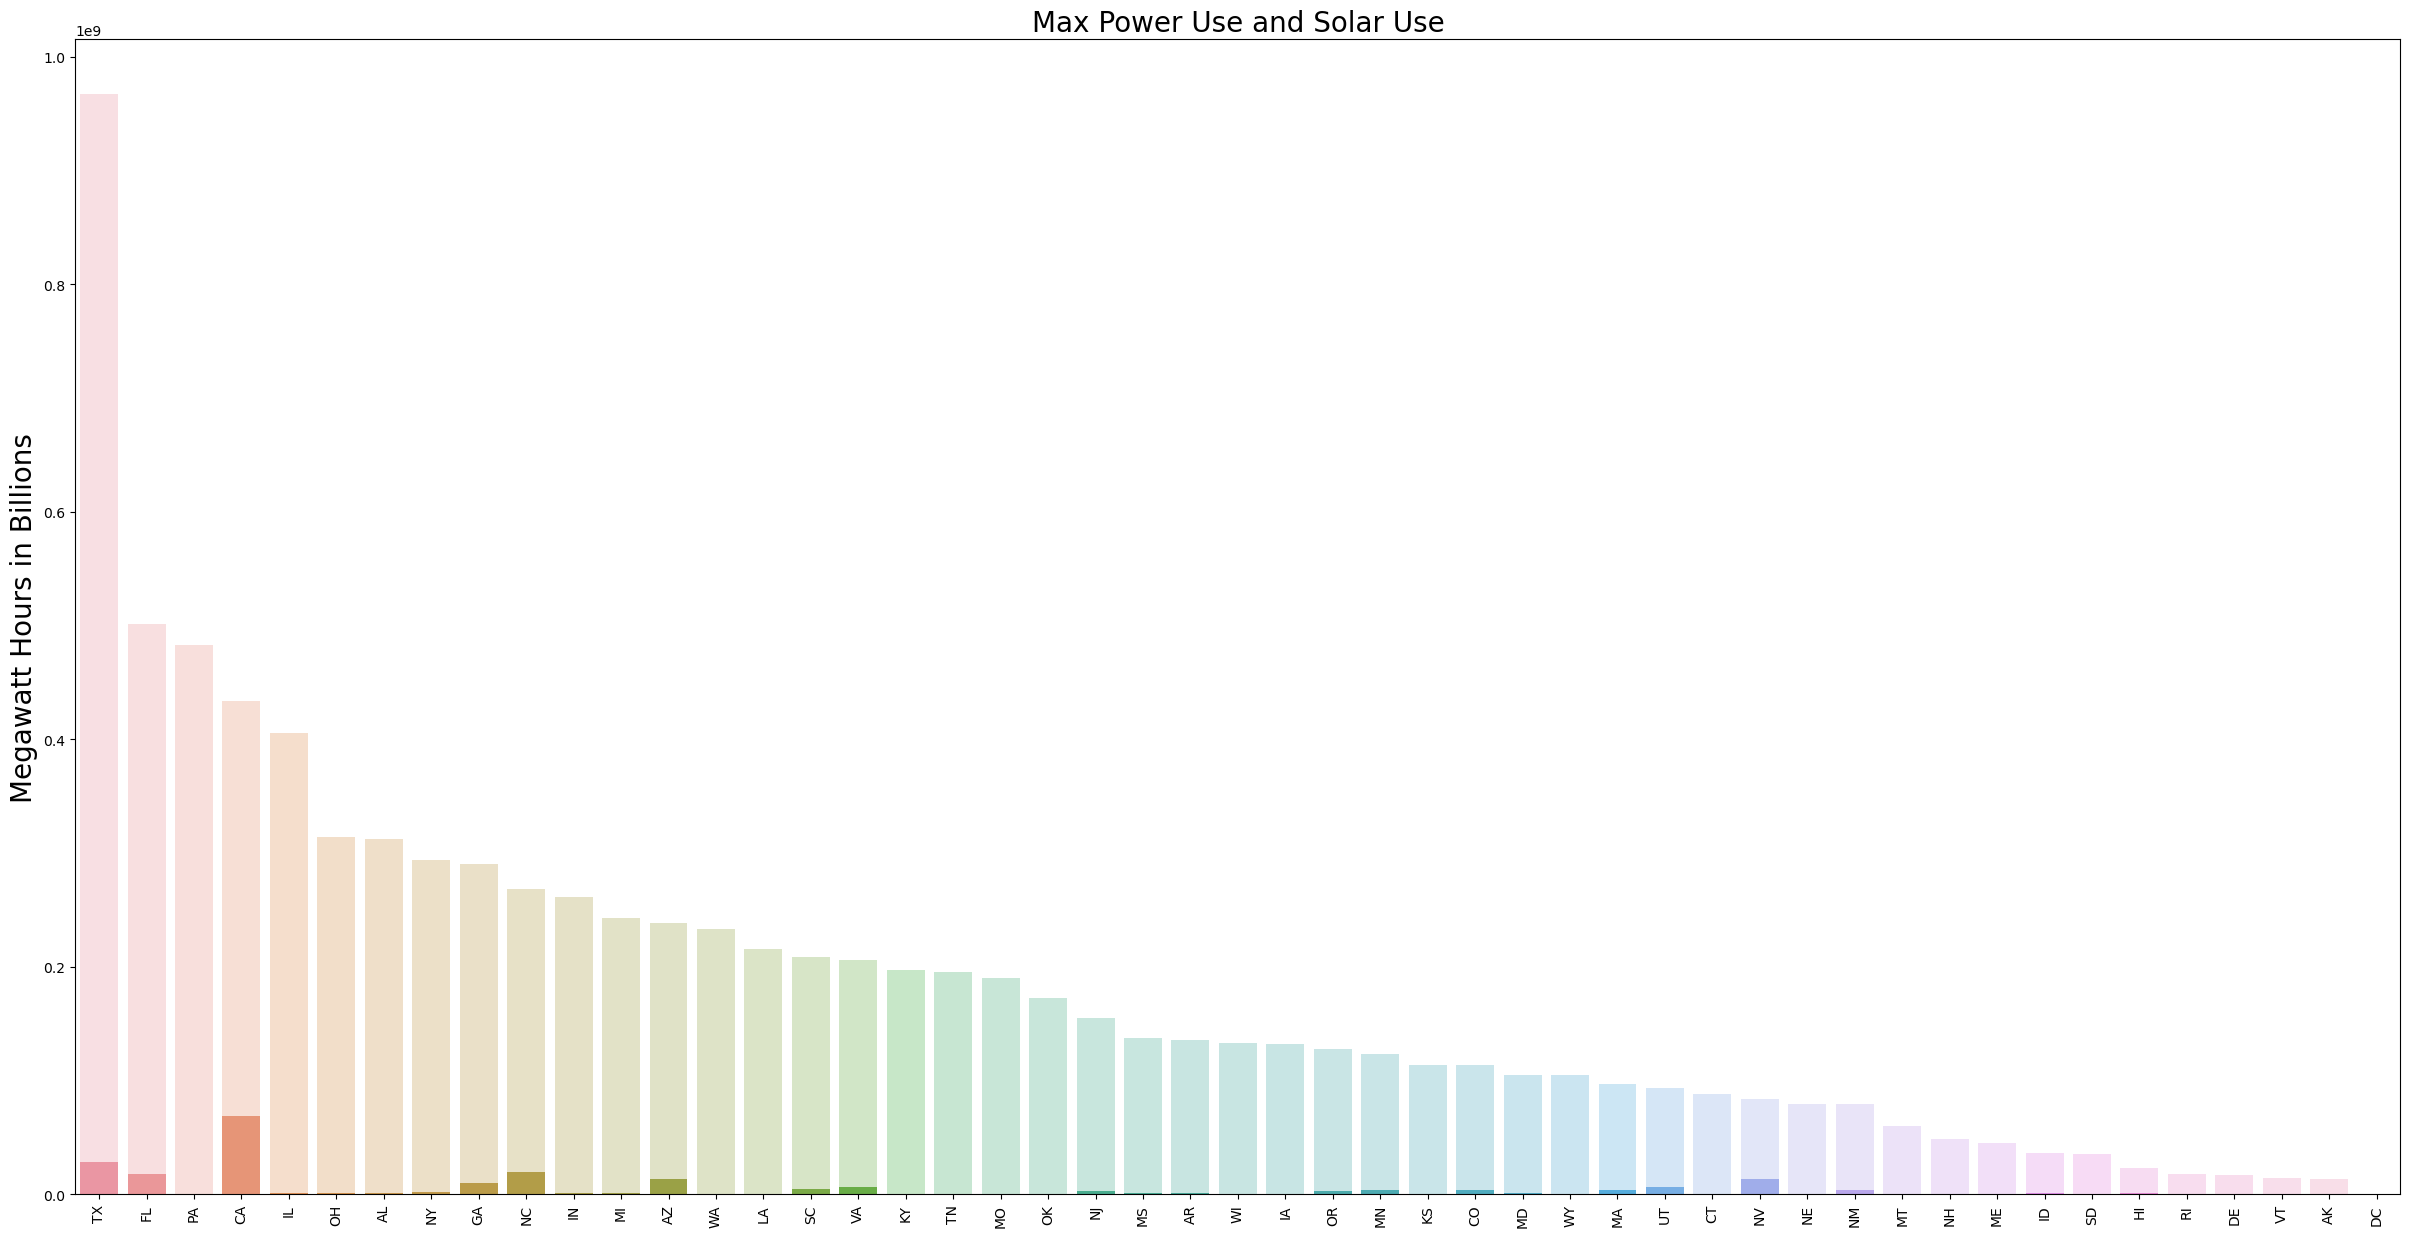

In [39]:
# Finds the difference of total power gen and how much of it was solar
plt.figure(figsize=(30,15))
sns.barplot(x=max_differences.index, y='Max_Total', data=max_differences, alpha = .3)
sns.barplot(x=max_differences.index, y='Max_Solar', data=max_differences)
plt.ylabel('Megawatt Hours in Billions',size=20)
plt.xticks(rotation=90)
plt.title('Max Power Use and Solar Use', size=20)


plt.show()

In [40]:
total_US_Max


,Difference,Max_Solar,Max_Total
US-TOTAL,8127198209.0,229356482.0,8.356555e+09


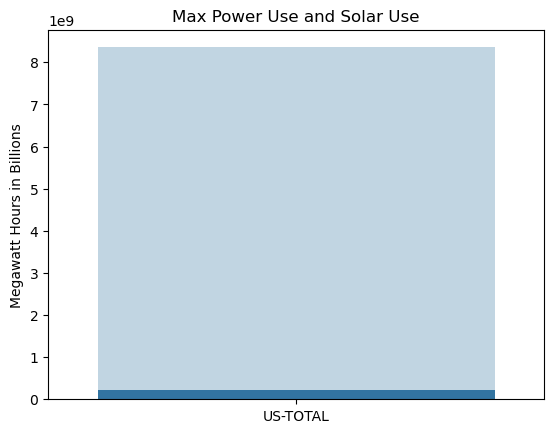

In [41]:
# Total US Power Use and how much of it was Solar
sns.barplot(x=total_US_Max.index, y='Max_Total', data=total_US_Max, alpha = .3)
sns.barplot(x=total_US_Max.index, y='Max_Solar', data=total_US_Max)
plt.ylabel('Megawatt Hours in Billions')

plt.title('Max Power Use and Solar Use')


plt.show()

# Sunshine Hours per City

In [42]:
sunshine_hours.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
0,Afghanistan,Kabul,177.2,178.6,204.5,232.5,310.3,353.4,356.8,339.7,303.9,282.6,253.2,182.4,3175.1
1,Albania,Tirana,124.0,125.0,165.0,191.0,263.0,298.0,354.0,327.0,264.0,218.0,127.0,88.0,2544.0
2,Algeria,Algiers,149.0,165.0,202.0,258.0,319.0,318.0,350.0,319.0,237.0,229.0,165.0,136.0,2847.0
3,Algeria,Tamanrasset,297.6,275.5,322.4,327.0,328.6,306.0,356.5,331.7,288.0,310.0,285.0,272.8,3686.0
4,Angola,Luanda,219.0,208.0,213.0,199.0,233.0,223.0,175.0,150.0,145.0,164.0,199.0,212.0,2341.0


In [43]:
sunshine_hours.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo', 'Croatia', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands',
       'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Kazakhstan', 'Kenya',
       'Latvia', 'Libya', 'Lithuania

In [44]:
# Filtering for just the US
sunshine_hours_us = sunshine_hours[sunshine_hours['Country'] == 'United States']

In [45]:
sunshine_hours_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 314 to 367
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  54 non-null     object 
 1   City     54 non-null     object 
 2   Jan      54 non-null     float64
 3   Feb      54 non-null     float64
 4   Mar      54 non-null     float64
 5   Apr      54 non-null     float64
 6   May      54 non-null     float64
 7   Jun      54 non-null     float64
 8   Jul      54 non-null     float64
 9   Aug      54 non-null     float64
 10  Sep      54 non-null     float64
 11  Oct      54 non-null     float64
 12  Nov      54 non-null     float64
 13  Dec      54 non-null     float64
 14  Year     54 non-null     float64
dtypes: float64(13), object(2)
memory usage: 6.8+ KB


In [46]:
sunshine_hours_us.City.nunique()

54

In [47]:
sunshine_hours_us.City.unique()

array(['Albuquerque', 'Anchorage', 'Atlanta', 'Austin', 'Baltimore',
       'Boise', 'Boston', 'Charlotte', 'Chicago', 'Cleveland', 'Columbus',
       'Dallas', 'Denver', 'Detroit', 'El Paso', 'Fresno', 'Honolulu',
       'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Memphis', 'Miami',
       'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans',
       'New York City', 'Nome', 'OklahomaCity', 'Omaha', 'Philadelphia',
       'Phoenix', 'Pittsburgh', 'Portland (OR)', 'Raleigh',
       'Richmond (VA)', 'Sacramento', 'Salt Lake City', 'San Antonio',
       'San Diego', 'San Francisco', 'Seattle', 'St. Louis', 'Tampa',
       'Tucson', 'Tulsa', 'Virginia Beach', 'Washington,D.C.', 'Wichita',
       'Yuma'], dtype=object)

In [48]:
sunshine_hours_us.head()

,Country,City,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
314,United States,Albuquerque,234.2,225.3,270.2,304.6,347.4,359.3,335.0,314.2,286.7,281.4,233.8,223.3,3415.4
315,United States,Anchorage,82.9,120.5,195.8,235.3,288.7,274.7,250.1,203.9,159.8,117.1,80.6,51.8,2061.2
316,United States,Atlanta,164.0,171.7,220.5,261.2,288.6,284.8,273.8,258.6,227.5,238.5,185.1,164.0,2738.3
317,United States,Austin,163.8,169.3,205.9,205.8,227.1,285.5,317.2,297.9,233.8,215.6,168.3,153.5,2643.7
318,United States,Baltimore,155.4,164.0,215.0,230.7,254.5,277.3,290.1,264.4,221.8,205.5,158.5,144.5,2581.7


In [49]:
# Putting the months in the proper order to use this order later on
months = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [50]:
sunshine_hours_us.columns

Index(['Country', 'City', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year'],
      dtype='object')

In [51]:
#Getting total hours per month per city
sunshine_melted = sunshine_hours_us.melt(id_vars=['City'],
    value_vars=months, 
                       var_name='Month', value_name='Hours')

In [52]:
sunshine_melted.head(5)

,City,Month,Hours
0,Albuquerque,Jan,234.2
1,Anchorage,Jan,82.9
2,Atlanta,Jan,164.0
3,Austin,Jan,163.8
4,Baltimore,Jan,155.4


In [53]:
monthly_avg_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='mean')
monthly_max_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='max')
monthly_min_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='min')
monthly_median_sunshine = sunshine_melted.pivot_table(index= 'Month' , values='Hours', aggfunc='median')

In [54]:
def sort_month(df):
    df.index = pd.Categorical(df.index, categories=months, ordered=True)
    return df.sort_index()
    

In [55]:
max_sun_sorted = sort_month(monthly_max_sunshine)
mean_sun_sorted = sort_month(monthly_avg_sunshine)
min_sun_sorted = sort_month(monthly_min_sunshine)
median_sun_sorted = sort_month(monthly_median_sunshine)

In [56]:
mean_sun_sorted.head()

,Hours
Jan,166.257407
Feb,176.737037
Mar,230.114815
Apr,257.946296
May,292.324074


In [57]:
max_sun_sorted['Min'] = min_sun_sorted['Hours']


In [58]:
max_min_sun = max_sun_sorted
max_min_sun.rename(columns={'Hours':'Max'},inplace=True)

In [59]:
max_min_sun.head()

,Max,Min
Jan,268.4,62.2
Feb,270.8,108.5
Mar,335.5,155.4
Apr,365.5,182.8
May,407.4,217.4


In [60]:
mean_sun_sorted = sort_month(monthly_avg_sunshine)

Text(0.5, 0, 'Month')

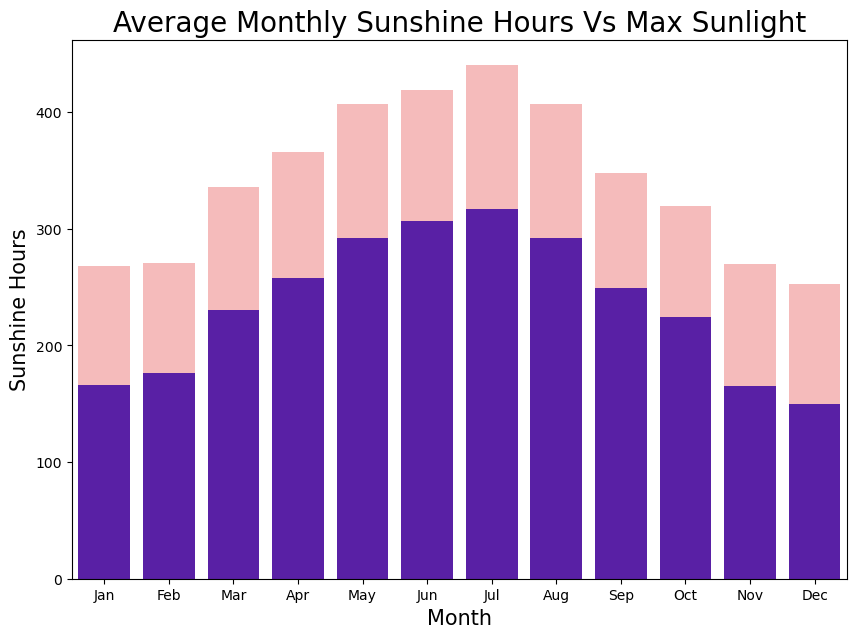

In [61]:
custom_palette = {'Mean': 'blue', 'Min': 'red'}
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data = mean_sun_sorted, x=mean_sun_sorted.index, y='Hours', color='blue')
sns.barplot(data=max_min_sun, x=max_min_sun.index, y="Max",color='red', alpha=.3)

ax.set_title('Average Monthly Sunshine Hours Vs Max Sunlight', fontsize=20)
ax.set_ylabel('Sunshine Hours', fontsize=15)
ax.set_xlabel('Month', fontsize=15)

Text(0.5, 0, 'Month')

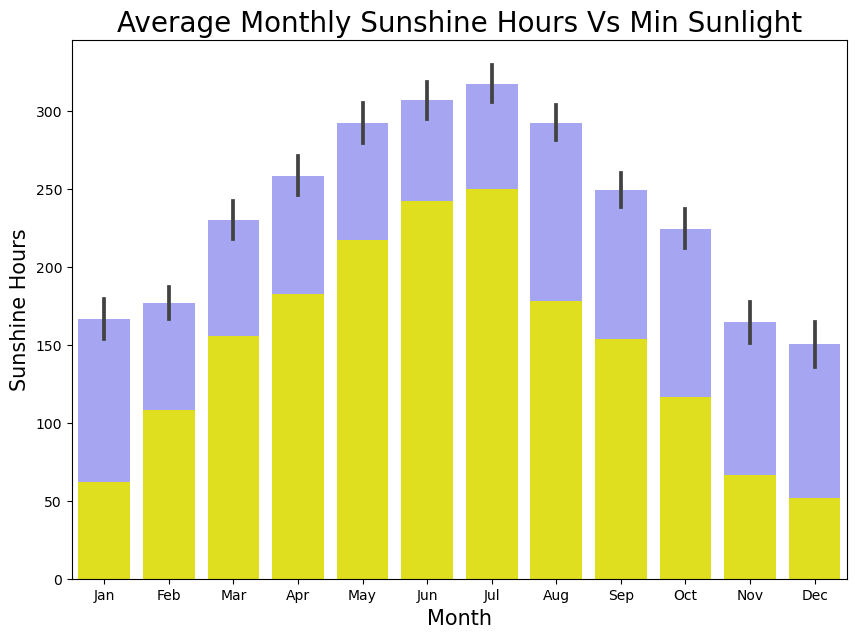

In [62]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data = sunshine_melted, x='Month', y='Hours',alpha=.4, color='blue')
sns.barplot(data=max_min_sun, x=max_min_sun.index, y="Min", color='yellow')

ax.set_title('Average Monthly Sunshine Hours Vs Min Sunlight', fontsize=20)
ax.set_ylabel('Sunshine Hours', fontsize=15)
ax.set_xlabel('Month', fontsize=15)

In [63]:
sunshine_hours_us.sort_values(by='Year', ascending=False,inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_36448\115391948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine_hours_us.sort_values(by='Year', ascending=False,inplace=True)


Text(0, 0.5, 'Sunshine Hours')

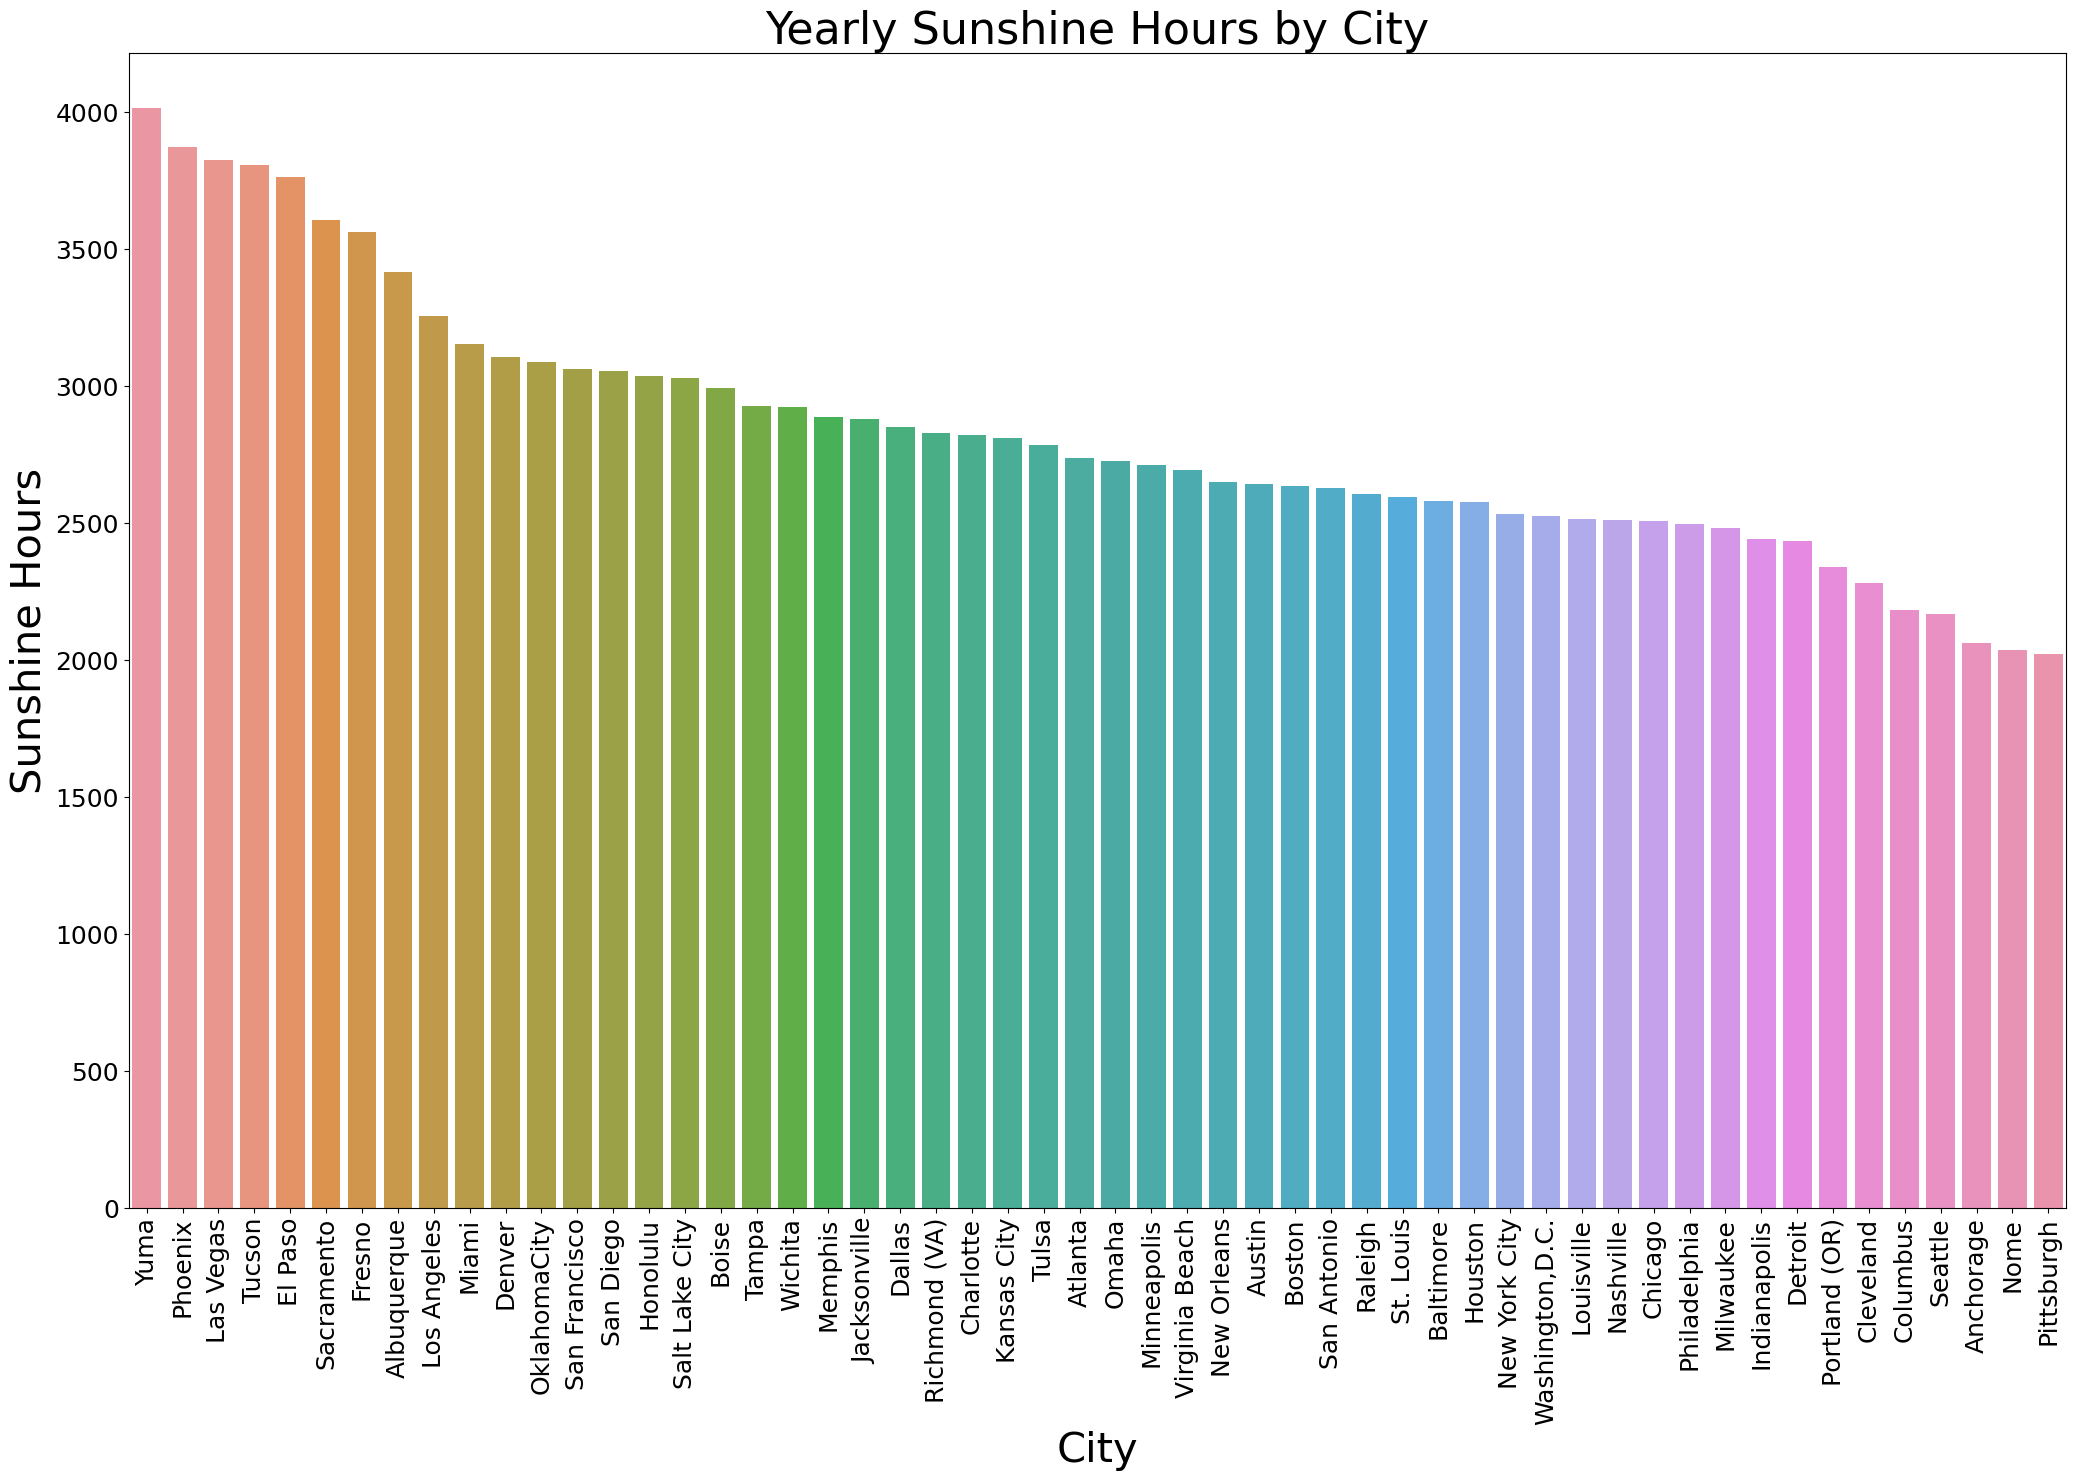

In [64]:
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(x='City', y='Year',data=sunshine_hours_us)
plt.xticks(rotation=90)
ax.tick_params(axis='both', which='both', labelsize=18)
ax.set_title('Yearly Sunshine Hours by City',fontsize = 32)
ax.set_xlabel('City', fontsize=30)
ax.set_ylabel('Sunshine Hours', fontsize=30)

In [65]:
sunshine_hours_us.City.unique()

array(['Yuma', 'Phoenix', 'Las Vegas', 'Tucson', 'El Paso', 'Sacramento',
       'Fresno', 'Albuquerque', 'Los Angeles', 'Miami', 'Denver',
       'OklahomaCity', 'San Francisco', 'San Diego', 'Honolulu',
       'Salt Lake City', 'Boise', 'Tampa', 'Wichita', 'Memphis',
       'Jacksonville', 'Dallas', 'Richmond (VA)', 'Charlotte',
       'Kansas City', 'Tulsa', 'Atlanta', 'Omaha', 'Minneapolis',
       'Virginia Beach', 'New Orleans', 'Austin', 'Boston', 'San Antonio',
       'Raleigh', 'St. Louis', 'Baltimore', 'Houston', 'New York City',
       'Washington,D.C.', 'Louisville', 'Nashville', 'Chicago',
       'Philadelphia', 'Milwaukee', 'Indianapolis', 'Detroit',
       'Portland (OR)', 'Cleveland', 'Columbus', 'Seattle', 'Anchorage',
       'Nome', 'Pittsburgh'], dtype=object)

In [66]:
sunshine_hours_us.replace({
    'Albuquerque': 'NM',
    'Anchorage': 'AK',
    'Atlanta': 'GA',
    'Austin': 'TX',
    'Baltimore': 'MD',
    'Boise': 'ID',
    'Boston': 'MA',
    'Charlotte': 'NC',
    'Chicago': 'IL',
    'Cleveland': 'OH',
    'Columbus': 'OH',
    'Dallas': 'TX',
    'Denver': 'CO',
    'Detroit': 'MI',
    'El Paso': 'TX',
    'Fresno': 'CA',
    'Honolulu': 'HI',
    'Houston': 'TX',
    'Indianapolis': 'IN',
    'Jacksonville': 'FL',
    'Kansas City': 'MO',
    'Las Vegas': 'NV',
    'Los Angeles': 'CA',
    'Louisville': 'KY',
    'Memphis': 'TN',
    'Miami': 'FL',
    'Milwaukee': 'WI',
    'Minneapolis': 'MN',
    'Nashville': 'TN',
    'New Orleans': 'LA',
    'New York City': 'NY',
    'Nome': 'AK',
    'OklahomaCity': 'OK',
    'Omaha': 'NE',
    'Philadelphia': 'PA',
    'Phoenix': 'AZ',
    'Pittsburgh': 'PA',
    'Portland (OR)': 'OR',
    'Raleigh': 'NC',
    'Richmond (VA)': 'VA',
    'Sacramento': 'CA',
    'Salt Lake City': 'UT',
    'San Antonio': 'TX',
    'San Diego': 'CA',
    'San Francisco': 'CA',
    'Seattle': 'WA',
    'St. Louis': 'MO',
    'Tampa': 'FL',
    'Tucson': 'AZ',
    'Tulsa': 'OK',
    'Virginia Beach': 'VA',
    'Washington,D.C.': 'DC',
    'Wichita': 'KS',
    'Yuma': 'AZ'
}, inplace = True
)

C:\Users\mainf\AppData\Local\Temp\ipykernel_36448\2026262541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine_hours_us.replace({


In [67]:
sunshine_hours_us.rename(columns={'City':'State'}, inplace=True)

C:\Users\mainf\AppData\Local\Temp\ipykernel_36448\1166514379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine_hours_us.rename(columns={'City':'State'}, inplace=True)


In [68]:
sunshine_hours_us.head()

,Country,State,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year
367,United States,AZ,268.4,270.8,335.5,365.5,407.4,415.4,392.6,375.6,341.7,319.6,270.1,252.7,4015.3
349,United States,AZ,256.0,257.2,318.4,353.6,401.0,407.8,378.5,360.8,328.6,308.9,256.0,244.8,3871.6
335,United States,NV,245.2,246.7,314.6,346.1,388.1,401.7,390.9,368.5,337.1,304.4,246.0,236.0,3825.3
362,United States,AZ,259.9,258.2,320.7,357.2,400.8,396.9,342.7,335.6,316.4,307.4,264.4,245.8,3806.0
328,United States,TX,254.5,263.0,326.0,348.0,384.7,384.1,360.2,335.4,304.1,298.6,257.6,246.3,3762.5


In [69]:
sunshine_hours_us.State.value_counts()

TX    5
CA    5
AZ    3
FL    3
TN    2
OH    2
PA    2
MO    2
NC    2
VA    2
AK    2
OK    2
KS    1
DC    1
WA    1
NM    1
OR    1
MI    1
IN    1
WI    1
CO    1
IL    1
KY    1
NY    1
ID    1
MD    1
MA    1
LA    1
MN    1
NV    1
GA    1
HI    1
UT    1
NE    1
Name: State, dtype: int64

In [70]:
sunshine_hours_us.State.nunique()

34

In [71]:
# Getting the average sunlight per state by taking the average sunlight 
# for cities that appeared more than once in the DF
sunshine_hours_states = pd.pivot_table(sunshine_hours_us, index= 'State', values=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Year'], aggfunc=np.mean)

In [72]:
sunshine_hours_states.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
State,,,,,,,,,,,,,
AK,240.300000,191.000000,52.400000,130.300000,72.550000,250.200000,275.00,200.400000,289.500000,73.50,116.900000,156.70,2048.750000
AZ,358.766667,357.333333,247.766667,262.066667,261.433333,371.266667,406.70,324.866667,403.066667,263.50,311.966667,328.90,3897.633333
CA,310.820000,347.680000,175.900000,211.160000,187.500000,370.100000,332.26,272.260000,331.400000,201.12,268.920000,299.38,3308.500000
CO,276.200000,306.400000,195.900000,211.100000,215.300000,325.000000,315.30,255.600000,290.000000,194.30,249.200000,272.30,3106.600000
DC,228.200000,263.100000,133.000000,151.800000,144.600000,280.500000,283.20,204.000000,260.500000,150.20,203.600000,225.00,2527.700000


In [73]:
sunshine_hours_states.index.value_counts()

AK    1
OK    1
NC    1
NE    1
NM    1
NV    1
NY    1
OH    1
OR    1
AZ    1
PA    1
TN    1
TX    1
UT    1
VA    1
WA    1
MO    1
MN    1
MI    1
MD    1
MA    1
LA    1
KY    1
KS    1
IN    1
IL    1
ID    1
HI    1
GA    1
FL    1
DC    1
CO    1
CA    1
WI    1
Name: State, dtype: int64

In [74]:
us_land_area.head()

,state,state_postal,total_area_rank,total_area_sq_mi,total_area_km2,land_area_rank,land_area_sq_mi,land_area_km2,percent_land,water_area_rank,water_area_sq_mi,water_area_km2,percent_water
0,Alaska,AK,1,665384.04,1723337,1,570640.95,1477953,0.8576,1,94743.1,245384,0.1424
1,Texas,TX,2,268596.46,695662,2,261231.71,676587,0.9726,8,7364.75,19075,0.0274
2,California,CA,3,163694.74,423967,3,155779.22,403466,0.9516,6,7915.52,20501,0.0484
3,Montana,MT,4,147039.71,380831,4,145545.80,376962,0.9898,26,1493.91,3869,0.0102
4,New Mexico,NM,5,121590.30,314917,5,121298.15,314161,0.9976,49,292.15,757,0.0024


In [75]:
us_land_area = us_land_area[['state_postal', 'land_area_sq_mi']]

In [76]:
us_land_area.head()

,state_postal,land_area_sq_mi
0,AK,570640.95
1,TX,261231.71
2,CA,155779.22
3,MT,145545.80
4,NM,121298.15


In [77]:
us_land_area.state_postal.nunique()

57

In [78]:
us_land_area.state_postal.unique()

array(['AK', 'TX', 'CA', 'MT', 'NM', 'AZ', 'NV', 'CO', 'OR', 'WY', 'MI',
       'MN', 'UT', 'ID', 'KS', 'NE', 'SD', 'WA', 'ND', 'OK', 'MO', 'FL',
       'WI', 'GA', 'IL', 'IA', 'NY', 'NC', 'AR', 'AL', 'LA', 'MS', 'PA',
       'OH', 'VA', 'TN', 'KY', 'IN', 'ME', 'SC', 'WV', 'MD', 'HI', 'MA',
       'VT', 'NH', 'NJ', 'CT', 'DE', 'RI', 'DC', 'PR', 'MP', 'VI', 'AS',
       'GU', 'UM'], dtype=object)

In [79]:
non_states = ['DC', 'PR', 'MP', 'VI', 'AS', 'GU', 'UM']
us_land_area = us_land_area[~us_land_area['state_postal'].isin(non_states)]

In [80]:
sunshine_and_land_area = pd.merge(sunshine_hours_states, us_land_area, left_on='State', right_on='state_postal',how='left')

In [81]:
sunshine_and_land_area.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Apr              34 non-null     float64
 1   Aug              34 non-null     float64
 2   Dec              34 non-null     float64
 3   Feb              34 non-null     float64
 4   Jan              34 non-null     float64
 5   Jul              34 non-null     float64
 6   Jun              34 non-null     float64
 7   Mar              34 non-null     float64
 8   May              34 non-null     float64
 9   Nov              34 non-null     float64
 10  Oct              34 non-null     float64
 11  Sep              34 non-null     float64
 12  Year             34 non-null     float64
 13  state_postal     33 non-null     object 
 14  land_area_sq_mi  33 non-null     float64
dtypes: float64(14), object(1)
memory usage: 4.2+ KB


In [82]:
sunshine_and_land_area.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,state_postal,land_area_sq_mi
0,240.300000,191.000000,52.400000,130.300000,72.550000,250.200000,275.00,200.400000,289.500000,73.50,116.900000,156.70,2048.750000,AK,570640.95
1,358.766667,357.333333,247.766667,262.066667,261.433333,371.266667,406.70,324.866667,403.066667,263.50,311.966667,328.90,3897.633333,AZ,113594.08
2,310.820000,347.680000,175.900000,211.160000,187.500000,370.100000,332.26,272.260000,331.400000,201.12,268.920000,299.38,3308.500000,CA,155779.22
3,276.200000,306.400000,195.900000,211.100000,215.300000,325.000000,315.30,255.600000,290.000000,194.30,249.200000,272.30,3106.600000,CO,103641.89
4,228.200000,263.100000,133.000000,151.800000,144.600000,280.500000,283.20,204.000000,260.500000,150.20,203.600000,225.00,2527.700000,NaN,NaN


In [83]:
# Arkansas land area value is inccorect. An extra 0 was added to the end so I updated it to the correct value
sunshine_and_land_area.loc[0,'land_area_sq_mi'] = 57064.095

In [84]:
sunshine_and_land_area['Sun:Land Ratio'] = round((sunshine_and_land_area['land_area_sq_mi'] * sunshine_and_land_area['Year']) / 1000000000,2)

In [85]:
sunshine_and_land_area.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,state_postal,land_area_sq_mi,Sun:Land Ratio
0,240.300000,191.000000,52.400000,130.300000,72.550000,250.200000,275.00,200.400000,289.500000,73.50,116.900000,156.70,2048.750000,AK,57064.095,0.12
1,358.766667,357.333333,247.766667,262.066667,261.433333,371.266667,406.70,324.866667,403.066667,263.50,311.966667,328.90,3897.633333,AZ,113594.080,0.44
2,310.820000,347.680000,175.900000,211.160000,187.500000,370.100000,332.26,272.260000,331.400000,201.12,268.920000,299.38,3308.500000,CA,155779.220,0.52
3,276.200000,306.400000,195.900000,211.100000,215.300000,325.000000,315.30,255.600000,290.000000,194.30,249.200000,272.30,3106.600000,CO,103641.890,0.32
4,228.200000,263.100000,133.000000,151.800000,144.600000,280.500000,283.20,204.000000,260.500000,150.20,203.600000,225.00,2527.700000,NaN,NaN,NaN


In [86]:
print(months)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [87]:
sunshine_and_land_area = sunshine_and_land_area[['state_postal','Sun:Land Ratio','Year', 'land_area_sq_mi', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [88]:
sunshine_and_land_area.rename(columns={'Year':'Yearly Sunlight', 'state_postal':'State'}, inplace=True)

In [89]:
sunshine_and_land_area.head()

,State,Sun:Land Ratio,Yearly Sunlight,land_area_sq_mi,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,AK,0.12,2048.750000,57064.095,72.550000,130.300000,200.400000,240.300000,289.500000,275.00,250.200000,191.000000,156.70,116.900000,73.50,52.400000
1,AZ,0.44,3897.633333,113594.080,261.433333,262.066667,324.866667,358.766667,403.066667,406.70,371.266667,357.333333,328.90,311.966667,263.50,247.766667
2,CA,0.52,3308.500000,155779.220,187.500000,211.160000,272.260000,310.820000,331.400000,332.26,370.100000,347.680000,299.38,268.920000,201.12,175.900000
3,CO,0.32,3106.600000,103641.890,215.300000,211.100000,255.600000,276.200000,290.000000,315.30,325.000000,306.400000,272.30,249.200000,194.30,195.900000
4,NaN,NaN,2527.700000,NaN,144.600000,151.800000,204.000000,228.200000,260.500000,283.20,280.500000,263.100000,225.00,203.600000,150.20,133.000000


In [90]:
sunshine_and_land_area.sort_values('Sun:Land Ratio', ascending=False,inplace=True)

In [91]:
sun_land = sunshine_and_land_area['Sun:Land Ratio']

In [92]:
sunshine_and_land_area = round(sunshine_and_land_area)

In [93]:
sunshine_and_land_area['Sun:Land Ratio'] = sun_land

In [94]:
sunshine_and_land_area.reset_index(drop=True,inplace=True)

In [95]:
sunshine_and_land_area.head()

,State,Sun:Land Ratio,Yearly Sunlight,land_area_sq_mi,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,TX,0.76,2893.0,261232.0,181.0,187.0,234.0,242.0,268.0,305.0,322.0,300.0,251.0,238.0,190.0,174.0
1,CA,0.52,3308.0,155779.0,188.0,211.0,272.0,311.0,331.0,332.0,370.0,348.0,299.0,269.0,201.0,176.0
2,AZ,0.44,3898.0,113594.0,261.0,262.0,325.0,359.0,403.0,407.0,371.0,357.0,329.0,312.0,264.0,248.0
3,NV,0.42,3825.0,109781.0,245.0,247.0,315.0,346.0,388.0,402.0,391.0,368.0,337.0,304.0,246.0,236.0
4,NM,0.41,3415.0,121298.0,234.0,225.0,270.0,305.0,347.0,359.0,335.0,314.0,287.0,281.0,234.0,223.0


In [96]:
melted_df = pd.melt(sunshine_and_land_area, id_vars='State', value_vars=months,var_name='Months', value_name='Sun_Hours')

In [97]:
melted_df.head()

,State,Months,Sun_Hours
0,TX,Jan,181.0
1,CA,Jan,188.0
2,AZ,Jan,261.0
3,NV,Jan,245.0
4,NM,Jan,234.0


<Axes: xlabel='Months', ylabel='Sun_Hours'>

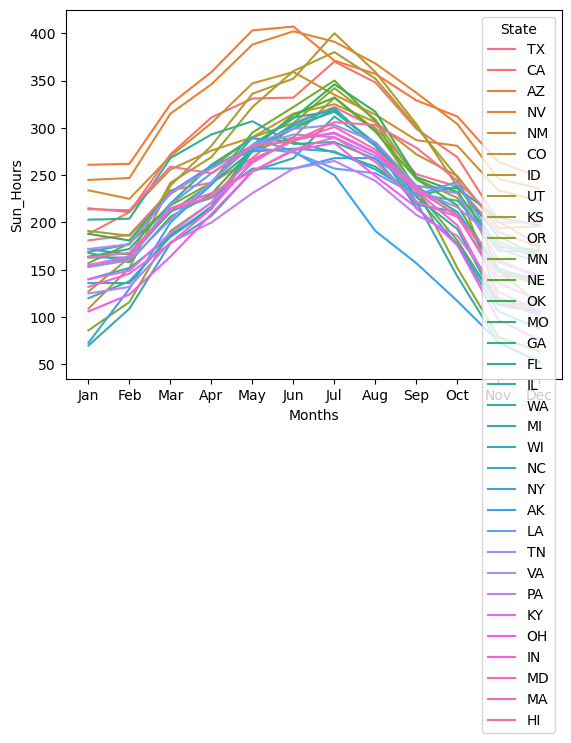

In [98]:
sns.lineplot(data=melted_df, x='Months', y='Sun_Hours',hue='State')

Text(0, 0.5, 'States')

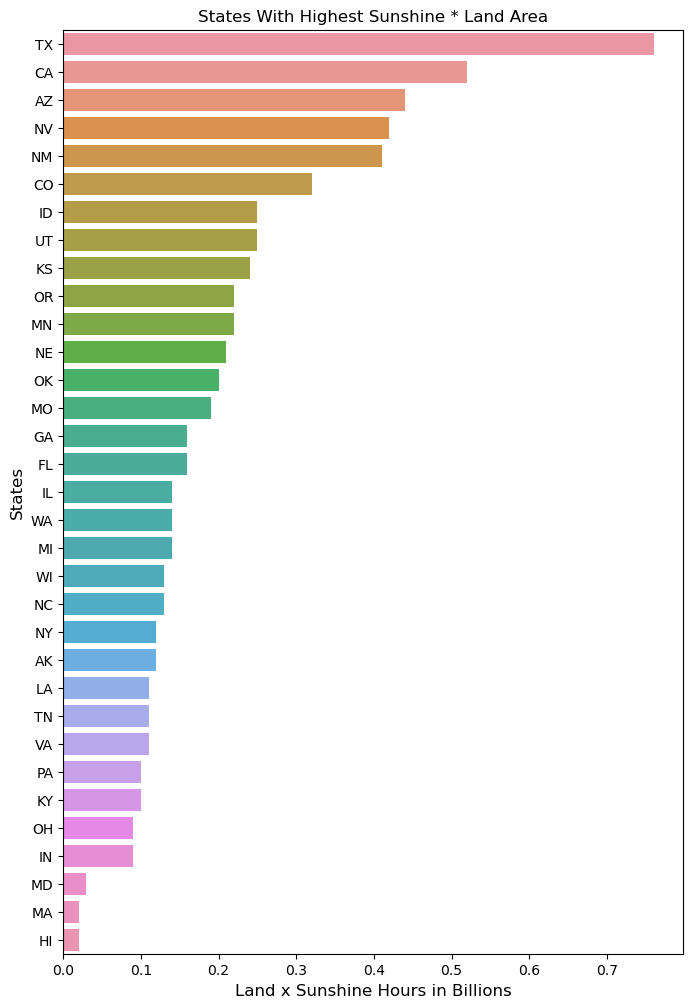

In [99]:
plt.figure(figsize=(8,12))
plt.title('States With Highest Sunshine * Land Area')

sns.barplot(data=sunshine_and_land_area,x='Sun:Land Ratio',y='State')
plt.xlabel('Land x Sunshine Hours in Billions',size=12)
plt.ylabel('States', size=12)

In [100]:
sun_multiplied_area = sunshine_and_land_area[months]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Multiply each month's value by the land area for each row (state)
sun_multiplied_area[months] = sunshine_and_land_area.apply(lambda row: row[months] * row['land_area_sq_mi'], axis=1)


C:\Users\mainf\AppData\Local\Temp\ipykernel_36448\3341552018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_multiplied_area[months] = sunshine_and_land_area.apply(lambda row: row[months] * row['land_area_sq_mi'], axis=1)


In [101]:
sun_multiplied_area[['State','land_area_sq_mi','Yearly Sunlight']] = sunshine_and_land_area[['State','land_area_sq_mi','Yearly Sunlight']]

C:\Users\mainf\AppData\Local\Temp\ipykernel_36448\2268994535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_multiplied_area[['State','land_area_sq_mi','Yearly Sunlight']] = sunshine_and_land_area[['State','land_area_sq_mi','Yearly Sunlight']]
C:\Users\mainf\AppData\Local\Temp\ipykernel_36448\2268994535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_multiplied_area[['State','land_area_sq_mi','Yearly Sunlight']] = sunshine_and_land_area[['State','land_area_sq_mi','Yearly Sunlight']]
C:\Users

In [102]:
#This is the surface area multiplied by sunlight hours
#This gives us a more usefull number because area times sunlight
#gives us a sort of "Total Power/Solar"
sun_multiplied_area.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,State,land_area_sq_mi,Yearly Sunlight
0,47282992.0,48850384.0,61128288.0,63218144.0,70010176.0,79675760.0,84116704.0,78369600.0,65569232.0,62173216.0,49634080.0,45454368.0,TX,261232.0,2893.0
1,29286452.0,32869369.0,42371888.0,48447269.0,51562849.0,51718628.0,57638230.0,54211092.0,46577921.0,41904551.0,31311579.0,27417104.0,CA,155779.0,3308.0
2,29648034.0,29761628.0,36918050.0,40780246.0,45778382.0,46232758.0,42143374.0,40553058.0,37372426.0,35441328.0,29988816.0,28171312.0,AZ,113594.0,3898.0
3,26896345.0,27115907.0,34581015.0,37984226.0,42595028.0,44131962.0,42924371.0,40399408.0,36996197.0,33373424.0,27006126.0,25908316.0,NV,109781.0,3825.0
4,28383732.0,27292050.0,32750460.0,36995890.0,42090406.0,43545982.0,40634830.0,38087572.0,34812526.0,34084738.0,28383732.0,27049454.0,NM,121298.0,3415.0


In [104]:
#plot a time series to predict the next 10 years of future energy use
# Test and train data. First 14 years are train the rest are test
total_gen.head()


STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TN,TX,US-TOTAL,UT,VA,VT,WA,WI,WV,WY
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,13487532.0,250690226.0,94384072.0,179822544.0,397192144.0,93752006.0,60981290.0,246478.0,13615370.0,381890686.0,...,192443952.0,745160010.0,7.473287e+09,71707500.0,148209496.0,10961228.0,166097340.0,117526868.0,163673450.0,89553876.0
2002,13534644.0,265841349.0,95223282.0,188263324.0,368420066.0,91200779.0,62622430.0,523960.0,12004981.0,406705553.0,...,192228530.0,771257079.0,7.716905e+09,73216011.0,150011312.0,10912380.0,205530098.0,116862873.0,189523505.0,87567678.0
2003,12677462.0,274974440.0,100802200.0,188792436.0,385577087.0,93233575.0,59090097.0,148288.0,14784572.0,425220024.0,...,184443582.0,758399368.0,7.766370e+09,76047335.0,150618842.0,12055924.0,200189380.0,120244851.0,189423106.0,87253204.0
2004,13053431.0,274709541.0,103855268.0,209128283.0,389560710.0,95738983.0,65266815.0,72974.0,15711105.0,436235853.0,...,195189090.0,780598265.0,7.941111e+09,76423959.0,157800077.0,10940760.0,204330101.0,120889869.0,179499126.0,89615211.0
2005,13153317.0,275897159.0,95589018.0,202957315.0,400585637.0,99233390.0,67099496.0,452084.0,16273136.0,440512824.0,...,194234337.0,793337444.0,8.110846e+09,76330262.0,157886089.0,11433509.0,203931697.0,123649326.0,187252572.0,91134619.0


In [105]:
total_gen = total_gen.reset_index()

In [107]:
train = total_gen[total_gen['YEAR'] < 2015]
test = total_gen[total_gen['YEAR'] >= 2015]

In [111]:
train['YEAR']

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
Name: YEAR, dtype: int64

In [107]:
#plot a time series to predict the next 10 years of future solar gen
# Test and train data. First 10 ish years are train the rest are test
solar_gen.head()

STATE,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,...,TN,TX,US-TOTAL,UT,VA,VT,WA,WI,WY,AK
YEAR,,,,,,,,,,,,,,,,,,,,,
2001,0.0,0.0,978.0,1084542.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-10.0,1085510.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,918.0,1108744.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1109662.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2003,0.0,0.0,790.0,1067212.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1068002.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,8534.0,1141780.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1150314.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2005,0.0,0.0,27160.0,1073426.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1100587.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#Calculate the difference between projected demand and projected solar generation

In [113]:
sun_multiplied_area['area X yearly sun'] = sun_multiplied_area['Yearly Sunlight'] * sun_multiplied_area['land_area_sq_mi']
sun_multiplied_area['area X yearly sun 10% of land'] = sun_multiplied_area['area X yearly sun'] * .1
sun_area_new = sun_multiplied_area.drop(axis=1, columns = months)
sun_area_new['land_area_sq_mi'] = sun_area_new['land_area_sq_mi'] * .1
sun_area_new.columns = ['State', '10% land area', 'Yearly Sunlight','Drop this column','10% land * yearly sun']
sun_area_new.drop('Drop this column',axis=1,inplace=True)

In [114]:
sun_area_new.head()

,State,10% land area,Yearly Sunlight,10% land * yearly sun
0,TX,26123.2,2893.0,75574417.6
1,CA,15577.9,3308.0,51531693.2
2,AZ,11359.4,3898.0,44278941.2
3,NV,10978.1,3825.0,41991232.5
4,NM,12129.8,3415.0,41423267.0


In [ ]:
#Using the above data, and the calculated difference between projected energy use and projected solar gen
# calculate 
# 1: how many solar panels could fit in 10% of each state
# 2: how much power these solar panels would generate based on the sunlight and area data
# 3: The price to purchase the needed amount of solar panels
# 4: How many solar panels would need to be purchased and installed each year
# 5: The return on investment after 30 years

In [ ]:
# Research auto regression model.
# Multivariate regression model if I can find sunlight data from year to year.
